# Hypothesis Testing with Men's and Women's Soccer Matches

- Project Instructions
Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.\
The p-value and the result of the test must be stored in a dictionary called result_dict in the form:\
result_dict = {"p_val": p_val, "result": result}\
where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official FIFA World Cup matches (not including qualifiers) since 2002-01-01.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: women_results.csv and men_results.csv.

The question you are trying to determine the answer to is:

Are more goals scored in women's international soccer matches than men's?
You assume a 10% significance level, and use the following null and alternative hypotheses:

 : The mean number of goals scored in women's international soccer matches is the same as men's.

 : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Loading datasets
men = pd.read_csv("men_results.csv")

In [2]:
# Looking the data
men.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [3]:
# Inspecting the data to see missing values
men.isna().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [4]:
# Dropping NaN Values
men = men.dropna()

In [5]:
# Looking the data without NaN values
men.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
# Checking the data again
men.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [7]:
# Dropping unnecessary columns
men.drop(['Year','Win conditions','Home Team Initials','Away Team Initials','Half-time Home Goals',
          'Half-time Away Goals','Referee','Assistant 1','Assistant 2','RoundID','MatchID','Stage',
          'Stadium','City','Attendance'], axis=1, inplace=True)

In [8]:
men.head()

,Datetime,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,13 Jul 1930 - 15:00,France,4.0,1.0,Mexico
1,13 Jul 1930 - 15:00,USA,3.0,0.0,Belgium
2,14 Jul 1930 - 12:45,Yugoslavia,2.0,1.0,Brazil
3,14 Jul 1930 - 14:50,Romania,3.0,1.0,Peru
4,15 Jul 1930 - 16:00,Argentina,1.0,0.0,France


In [9]:
# Renaming columns 
men.rename(columns={'Datetime':'datetime','Home Team Name': 'home_team', 'Home Team Goals': 'home_score',
                  'Away Team Goals':'away_score','Away Team Name':'away_team'}, inplace=True)

In [10]:
men.head()

,datetime,home_team,home_score,away_score,away_team
0,13 Jul 1930 - 15:00,France,4.0,1.0,Mexico
1,13 Jul 1930 - 15:00,USA,3.0,0.0,Belgium
2,14 Jul 1930 - 12:45,Yugoslavia,2.0,1.0,Brazil
3,14 Jul 1930 - 14:50,Romania,3.0,1.0,Peru
4,15 Jul 1930 - 16:00,Argentina,1.0,0.0,France


In [11]:
# shift column 'Name' to first position 
first_column = men.pop('away_team')

In [12]:
# Moving the away column
men.insert(2, 'away_team', first_column)

In [13]:
men.head()

,datetime,home_team,away_team,home_score,away_score
0,13 Jul 1930 - 15:00,France,Mexico,4.0,1.0
1,13 Jul 1930 - 15:00,USA,Belgium,3.0,0.0
2,14 Jul 1930 - 12:45,Yugoslavia,Brazil,2.0,1.0
3,14 Jul 1930 - 14:50,Romania,Peru,3.0,1.0
4,15 Jul 1930 - 16:00,Argentina,France,1.0,0.0


In [23]:
# men['Datetime'] = pd.to_datetime(men['Datetime'], format="%d %b %Y - %H:%M")

In [27]:
# men['Datetime'] = pd.to_datetime(men['Datetime'], format='ISO8601')

In [29]:
# men= pd.to_datetime(men['datetime'], format='mixed', dayfirst=True)

In [14]:
men['datetime'] = pd.to_datetime(men['datetime'], format='mixed')

In [15]:
men.head()

,datetime,home_team,away_team,home_score,away_score
0,1930-07-13 15:00:00,France,Mexico,4.0,1.0
1,1930-07-13 15:00:00,USA,Belgium,3.0,0.0
2,1930-07-14 12:45:00,Yugoslavia,Brazil,2.0,1.0
3,1930-07-14 14:50:00,Romania,Peru,3.0,1.0
4,1930-07-15 16:00:00,Argentina,France,1.0,0.0


In [16]:
# Loading dataset
women = pd.read_csv("women_results.csv", parse_dates=['date'])

In [17]:
women = women.drop('Unnamed: 0', axis=1)
women

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship
...,...,...,...,...,...,...
4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro
4880,2022-07-23,France,Netherlands,1,0,UEFA Euro
4881,2022-07-26,England,Sweden,4,0,UEFA Euro
4882,2022-07-27,Germany,France,2,1,UEFA Euro


In [20]:
# Filter the data for the time range and tournament
# men["datetime"] = pd.to_datetime(men["datetime"])
men_subset = men[(men["datetime"] > "2002-01-01")]
men_subset.head()

,datetime,home_team,away_team,home_score,away_score
580,2002-05-31 20:30:00,France,Senegal,0.0,1.0
581,2002-06-01 18:00:00,Uruguay,Denmark,1.0,2.0
582,2002-06-01 15:30:00,"rn"">Republic of Ireland",Cameroon,1.0,1.0
583,2002-06-01 20:30:00,Germany,Saudi Arabia,8.0,0.0
584,2002-06-02 14:30:00,Argentina,Nigeria,1.0,0.0


In [21]:
# women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01")]
women_subset.head()

,date,home_team,away_team,home_score,away_score,tournament
1365,2002-01-23,Norway,United States,1,0,Four Nations Tournament
1366,2002-01-23,China PR,Germany,2,1,Four Nations Tournament
1367,2002-01-25,Germany,United States,0,0,Four Nations Tournament
1368,2002-01-25,China PR,Norway,0,3,Four Nations Tournament
1369,2002-01-27,Germany,Norway,3,1,Four Nations Tournament


In [23]:
# Create group and goals_scored columns
men_subset.loc[:, "group"] = "men"
women_subset.loc[:, "group"] = "women"
men_subset.loc[:, "goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset.loc[:,"goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

In [24]:
men_subset.head()

,datetime,home_team,away_team,home_score,away_score,group,goals_scored
580,2002-05-31 20:30:00,France,Senegal,0.0,1.0,men,1.0
581,2002-06-01 18:00:00,Uruguay,Denmark,1.0,2.0,men,3.0
582,2002-06-01 15:30:00,"rn"">Republic of Ireland",Cameroon,1.0,1.0,men,2.0
583,2002-06-01 20:30:00,Germany,Saudi Arabia,8.0,0.0,men,8.0
584,2002-06-02 14:30:00,Argentina,Nigeria,1.0,0.0,men,1.0


In [25]:
women_subset.head()

,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1365,2002-01-23,Norway,United States,1,0,Four Nations Tournament,women,1
1366,2002-01-23,China PR,Germany,2,1,Four Nations Tournament,women,3
1367,2002-01-25,Germany,United States,0,0,Four Nations Tournament,women,0
1368,2002-01-25,China PR,Norway,0,3,Four Nations Tournament,women,3
1369,2002-01-27,Germany,Norway,3,1,Four Nations Tournament,women,4


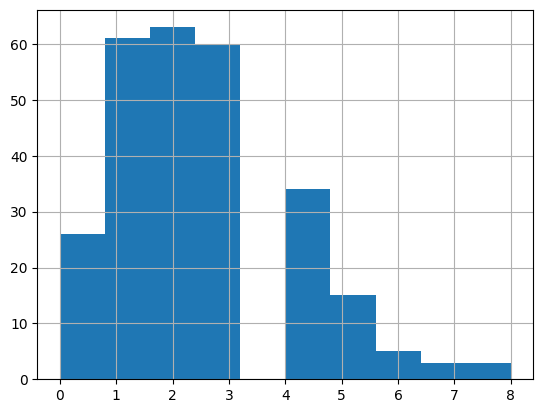

<Figure size 640x480 with 0 Axes>

In [27]:
# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

In [28]:
# Combine women's and men's data and calculate goals scored in each match
both_df = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)
both_df.head()

,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored,datetime
0,2002-01-23,Norway,United States,1.0,0.0,Four Nations Tournament,women,1.0,NaT
1,2002-01-23,China PR,Germany,2.0,1.0,Four Nations Tournament,women,3.0,NaT
2,2002-01-25,Germany,United States,0.0,0.0,Four Nations Tournament,women,0.0,NaT
3,2002-01-25,China PR,Norway,0.0,3.0,Four Nations Tournament,women,3.0,NaT
4,2002-01-27,Germany,Norway,3.0,1.0,Four Nations Tournament,women,4.0,NaT


In [29]:
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both_df[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")
both_subset_wide.head()

group,men,women
0,NaN,1.0
1,NaN,3.0
2,NaN,0.0
3,NaN,3.0
4,NaN,4.0


In [31]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")
results_pg

,U-val,alternative,p-val,RBC,CLES
MWU,600366.0,greater,1.281060e-13,0.263755,0.631878


In [32]:
# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")
results_scipy

MannwhitneyuResult(statistic=600366.0, pvalue=1.2810596633388787e-13)

In [33]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]
p_val

1.2810596633388787e-13

In [34]:
# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

In [35]:
print(result_dict)

{'p_val': 1.2810596633388787e-13, 'result': 'reject'}
